# Tutorial: Visualizing Errors: Residual Plots after `.predict()`

Metrik seperti RMSE dan R² memberi kita satu angka ringkasan tentang performa model. Angka-angka ini bagus, tetapi mereka tidak menceritakan keseluruhan cerita. Mereka memberi tahu kita *seberapa banyak* kesalahan yang dibuat model, tetapi tidak *bagaimana* atau *di mana* kesalahan itu terjadi.

**Residual Plot** adalah alat diagnostik visual yang memungkinkan kita untuk "melihat" kesalahan model kita. Dengan menganalisis pola dalam kesalahan, kita bisa mendapatkan wawasan mendalam tentang kelemahan model dan bagaimana cara memperbaikinya.

---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Mendefinisikan apa itu **residual**.
* Membuat residual plot menggunakan Matplotlib dan Seaborn.
* Menginterpretasikan residual plot untuk mendiagnosis kesehatan model Anda.
* Mengenali pola-pola umum dalam residual plot (seperti non-linearitas dan heteroscedasticity) dan memahami artinya.

---
### 2. Setup: Menggunakan Model yang Sudah Ada

Kita akan melanjutkan dari titik terakhir kita. Kita sudah memiliki model yang dilatih pada dataset "Advertising" dan prediksi yang sudah dibuat.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Memuat dataset
data = {
    'TV': [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8, 66.1, 214.7, 23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3],
    'Radio': [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6, 5.8, 24.0, 35.1, 7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9],
    'Newspaper': [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2, 24.2, 4.0, 65.9, 7.2, 46.0, 52.9, 114.0, 55.8, 18.3, 19.1],
    'Sales': [22.1, 10.4, 12.0, 16.6, 17.9, 7.2, 11.8, 13.2, 4.8, 15.6, 12.6, 17.4, 9.2, 9.7, 19.0, 22.4, 12.5, 24.4, 11.3, 14.6]
}
df = pd.DataFrame(data)

# Persiapan data dan model (sama seperti sebelumnya)
X = df[['TV', 'Radio', 'Newspaper']]
Y = df['Sales']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

### 3. Menghitung Residual

**Residual** adalah nama lain untuk **kesalahan prediksi**. Perhitungannya sangat sederhana:

`Residual = Nilai Aktual (y_test) - Nilai Prediksi (y_pred)`

* Jika residual **positif**, berarti model kita **under-predict** (prediksi terlalu rendah).
* Jika residual **negatif**, berarti model kita **over-predict** (prediksi terlalu tinggi).
* Jika residual **nol**, berarti model kita menebak dengan sempurna.

In [23]:
# menghitung residual
residual = Y_test - Y_pred
print(residual)

0     1.321135
17    1.138120
15    3.414607
1    -0.128591
Name: Sales, dtype: float64


---
### 4. Membuat Residual Plot

Residual plot standar adalah sebuah `scatterplot` dengan:
* **Sumbu X:** Nilai Prediksi (`y_pred`)
* **Sumbu Y:** Residual

Kita juga akan menambahkan garis horizontal di `y=0` sebagai referensi.

Text(0, 0.5, 'residual (kesalahan)')

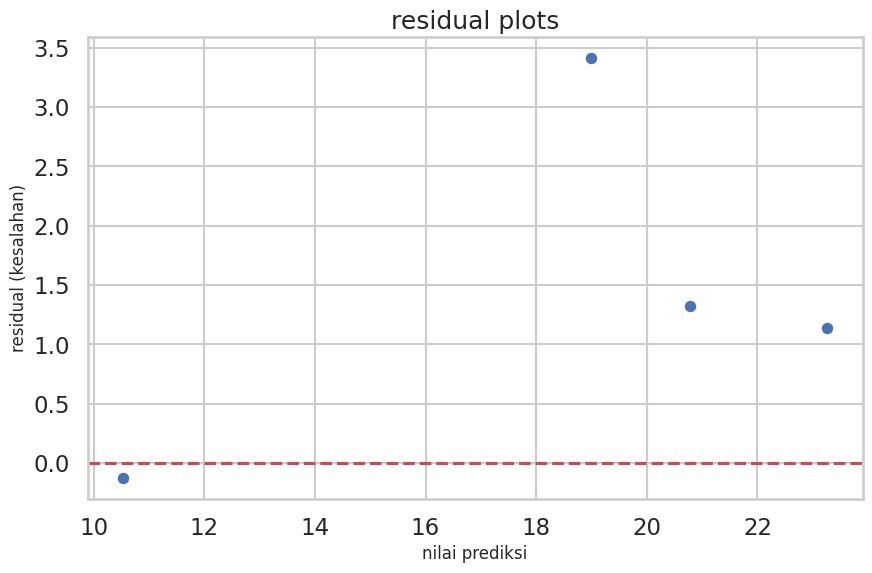

In [24]:
sns.set_theme(style='whitegrid',context='talk')

plt.figure(figsize=(10,6))

sns.scatterplot(
    x=Y_pred, 
    y=residual
)

plt.axhline(y=0, color='r', linestyle='--')

# tambahkan label
plt.title('residual plots', fontsize=18)
plt.xlabel('nilai prediksi', fontsize=12)
plt.ylabel('residual (kesalahan)', fontsize=12)

### 5. Menginterpretasikan Plot

Sekarang, bagian terpenting: apa arti dari plot di atas?

#### **Tanda Model yang "Sehat" (Yang Kita Inginkan):**



Sebuah residual plot yang ideal akan terlihat seperti **awan titik yang tersebar secara acak di sekitar garis nol**. Tidak ada pola yang jelas. Ini berarti bahwa kesalahan model kita bersifat acak (*random noise*), yang merupakan pertanda baik. Ini menunjukkan bahwa model telah menangkap semua pola yang bisa ia pelajari, dan yang tersisa hanyalah kesalahan yang tidak dapat diprediksi.

#### **Pola-Pola Bermasalah (Yang Perlu Diwaspadai):**

Jika Anda melihat pola yang jelas dalam residual plot Anda, itu adalah "bendera merah" yang menunjukkan ada sesuatu yang salah dengan model Anda.

**1. Pola Kurva (Bentuk U atau U terbalik)**

* **Arti:** Hubungan antara fitur dan target Anda sebenarnya **tidak linear**. Model Regresi Linear (yang hanya bisa menggambar garis lurus) tidak cukup kompleks untuk menangkap pola ini.
* **Solusi:** Anda mungkin perlu mencoba model yang lebih kompleks seperti **Polynomial Regression** (yang akan kita pelajari selanjutnya) atau menambahkan fitur baru yang dapat menangkap hubungan non-linear ini.

**2. Pola Corong/Terompet (Heteroscedasticity)**

* **Arti:** Varians dari kesalahan **tidak konstan**. Kesalahan model menjadi **semakin besar (atau semakin kecil) seiring dengan meningkatnya nilai prediksi**.
* **Contoh:** Model Anda sangat akurat dalam memprediksi harga rumah murah, tetapi sangat tidak akurat untuk rumah mahal.
* **Solusi:** Ini bisa diperbaiki dengan mentransformasi variabel target (misalnya, menggunakan logaritma dari harga) atau menggunakan teknik regresi yang lebih canggih.

**Analisis Plot Kita:**
Plot residual kita terlihat tidak cukup bagus! variansi semakin besar pada y besar.


### Kesimpulan
 
* Jangan hanya bergantung pada metrik angka seperti R². **Selalu visualisasikan kesalahan Anda.**
* **Residual plot** adalah alat diagnostik yang sangat kuat untuk memahami *bagaimana* model Anda salah.
* Plot yang ideal menunjukkan **sebaran acak** di sekitar nol.
* Pola dalam residual plot adalah petunjuk berharga tentang bagaimana cara **memperbaiki dan meningkatkan** model Anda.
